# Dataset Titanic

Во время семинара на датасете Титаник были получены определенные значения ошибок. **Задача** состоит в том, чтобы:
- Используя любой из классификаторов получить значения precision, recall и accuracy выше, чем у моделей с занятия. Если не удалось получить результат лучше, провести подробный анализ причины неудачи.
- Используя любую из регрессионных задач получить значение RootMeanSquaredError ниже, чем у модели с занятия. Если не удалось получить результат лучше, провести подробный анализ причины неудачи.
- Сделать выводы о полученных результатах.

При этом нужно:
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

## 1. Загрузка данных и первичный анализ

Загружаем два набора данных датасета Титаник: train и test.
Проводим первичный анализ данных:
   - Посмотрим на первые строки (`head()`), чтобы понять структуру данных.
   - Получим общую информацию о столбцах: типы данных, количество непустых значений (`info()`).
   - Проведем описательный анализ для числовых столбцов (`describe()`).
   - Проверим наличие пропусков (`isnull().sum()`).

In [197]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train:")
print(train.head()) 
print(train.info())  
print(train.describe()) 
print(train.isnull().sum())

print("\nTest:")
print(test.head())
print(test.info())
print(test.isnull().sum())

Train:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN       

Видим, что в train имеются пропуски в столбцах:
   - `Age` 177 пропусков,
   - `Cabin` 687 пропусков,
   - `Embarked` 2 пропуска.
     
В test пропуски в столбцах:
   - `Age` 86 пропусков,
   - `Fare` 1 пропуск,
   - `Cabin` 327 пропусков.

## 2. Чистка данных

Обработаем пропущенные значения для столбцов Age, Fare и Embarked.
Пропуски в Age заполним медианным значением возраста для соответствующего пассажирского класса (Pclass).
Пропуски в Fare заполним медианными значениями, чтобы избежать смещения данных.
Пропуски в Embarked заполним самым частым значением.
После заполнения пропущенных значений проверим, остались ли пустые значения.

In [198]:
ages_median = train.groupby("Pclass")["Age"].median()

def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    if pd.isnull(Age):
        return ages_median[Pclass]
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

print("\nTrain:")
print(train.isnull().sum())
print("\nTest:")
print(test.isnull().sum())


Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Пропущенные значения в столбцах Age, Fare и Embarked отсутствуют.
Столбец Cabin по-прежнему содержит значительное количество пропусков, но решение о его обработке приним после выполнения разведочного анализа данных (EDA).

## 3. Разведочный анализ (EDA)

Визуализируем данные, чтобы понять распределение значений в ключевых столбцах, выявить связи между переменными, которые могут быть полезны для классификации, принять решение, какие столбцы включать или исключать из анализа.

Посмотрим на графики распределения пола, класса и возраста по статусу выживания.

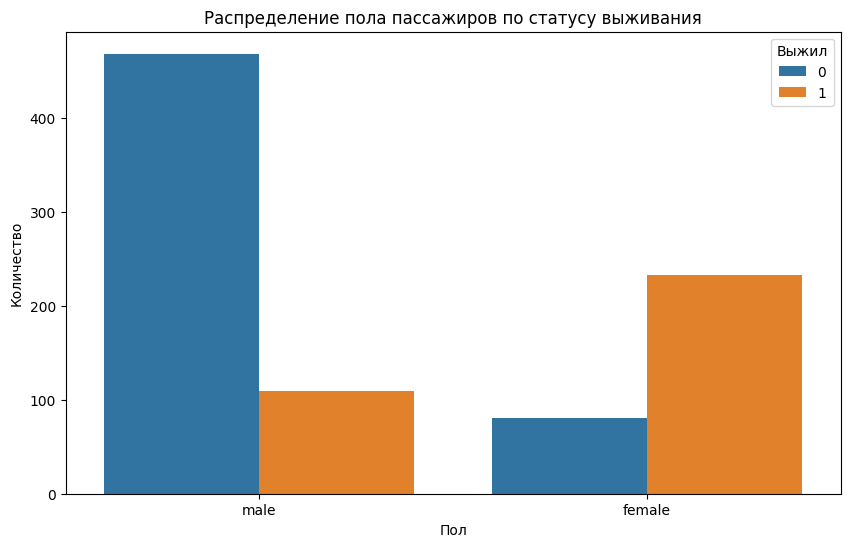

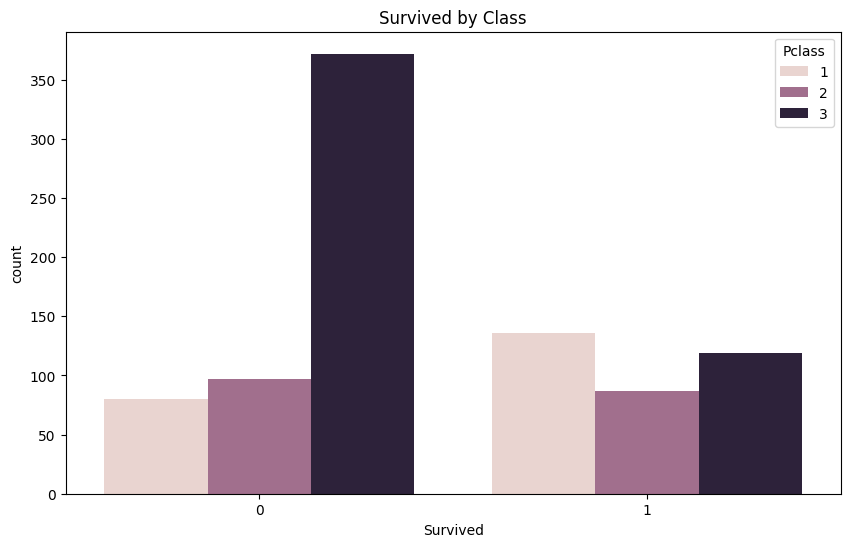

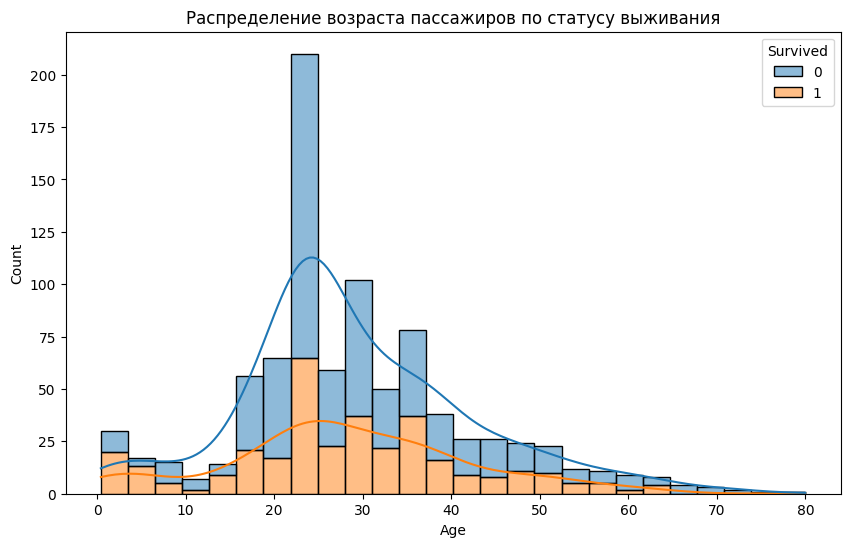

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Распределение пола пассажиров по статусу выживания')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Выжил')
plt.show()

sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Распределение класса пассажиров по статусу выживания')
plt.title('Survived by Class')
plt.show()

sns.histplot(data=train, x="Age", hue="Survived", multiple="stack", kde=True)
plt.title('Распределение возраста пассажиров по статусу выживания')
plt.show()

Видим, что эти признаки значимы для дальнейшего анализа и построения модели, так как влияют на выживаемость (например, женщины выживали чаще, чем мужчины; пассажиры первого класса выживали чаще, чем из второго и третьего; выживаемость была более высокой среди людей в возрасте от 20 до 40 лет).

Построим тепловую карту корреляций, чтобы оценить, как признаки взаимосвязаны друг с другом и как они влияют на выживаемость. Это поможет выделить важные признаки для дальнейшего анализа и моделирования.

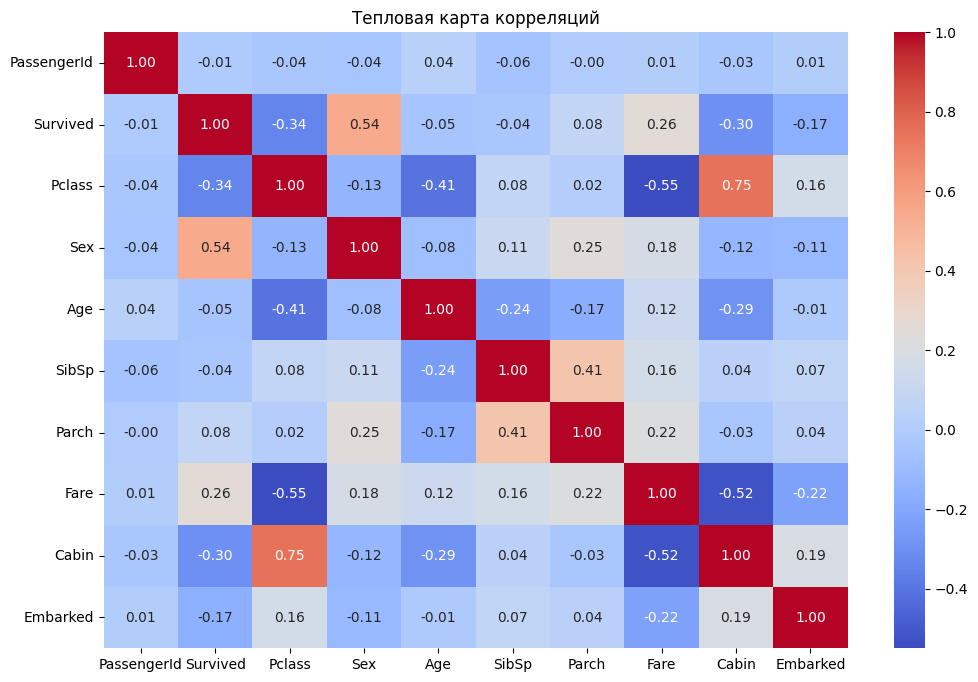

In [200]:
train_corr = train.copy()

train_corr['Sex'] = train_corr['Sex'].map({'male': 0, 'female': 1})

train_corr['Embarked'] = train_corr['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train_corr['Cabin'] = train_corr['Cabin'].fillna('U').str[0]

cabin_mapping = {char: idx for idx, char in enumerate(sorted(train_corr['Cabin'].unique()))}
train_corr['Cabin'] = train_corr['Cabin'].map(cabin_mapping)

train_corr = train_corr.drop(columns=['Name', 'Ticket'])

correlation_matrix = train_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций')
plt.show()

## 4. Полезные преобразования данных

Объединим количество братьев, сестер, супругов (SibSp) и родителей, детей (Parch) в один признак "Relatives", так как их раздельное влияние на выживаемость минимально.

In [201]:
train['Relatives'] = train['SibSp'] + train['Parch']
test['Relatives'] = test['SibSp'] + test['Parch']

train.drop(columns=['SibSp', 'Parch'], inplace=True)
test.drop(columns=['SibSp', 'Parch'], inplace=True)

Признаки "PassengerId", "Name", "Ticket" не содержат полезной информации для предсказания, судя по корреляции и логике задачи, поэтому удалим их.

In [202]:
train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

Преобразуем признак "Cabin" в числовую форму, так как нам важно только наличие или отсутствие каюты. Теперь признак будет указывать, была ли информация о каюте у пассажира (1) или нет (0), что также устранит пропуски.

In [203]:
train['Cabin'] = train['Cabin'].notnull().astype(int)
test['Cabin'] = test['Cabin'].notnull().astype(int)

Преобразуем категориальные признаки "Sex" и "Embarked" в числовые, где для "Sex" 0 - это мужской пол, 1 - женский, а для "Embarked" 'C'- 0, 'Q'- 1, 'S'- 2.

In [204]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Посмотрим на результаты преобразований:

In [205]:
print("Train dataset after transformations:")
print(train.head())
print("\nTest dataset after transformations:")
print(test.head())

Train dataset after transformations:
   Survived  Pclass  Sex   Age     Fare  Cabin  Embarked  Relatives
0         0       3    0  22.0   7.2500      0         2          1
1         1       1    1  38.0  71.2833      1         0          1
2         1       3    1  26.0   7.9250      0         2          0
3         1       1    1  35.0  53.1000      1         2          1
4         0       3    0  35.0   8.0500      0         2          0

Test dataset after transformations:
   Pclass  Sex   Age     Fare  Cabin  Embarked  Relatives
0       3    0  34.5   7.8292      0         1          0
1       3    1  47.0   7.0000      0         2          1
2       2    0  62.0   9.6875      0         1          0
3       3    0  27.0   8.6625      0         2          0
4       3    1  22.0  12.2875      0         2          2


## 5. Построение модели и оценка ее эффективности

Модели будем строить на наборе данных train, разделив его на обучающую и тестовую выборки. Test не используем, так как в нём отсутствует значение Survived (но в преобразованиях данных я решила его оставить).

Основная цель — попытаться улучшить метрики (precision, recall, accuracy) для классификации, а также уменьшить ошибку RMSE для регрессии.

- Для DecisionTreeClassifier:

precision для выживших --- 0.79
recall для выживших --- 0.72
f1_score для выживших --- 0.75

- Для RandomForestClassifier:

accuracy --- 0.8

- Для LogisticRegression:

precision для погибших --- 0.81
recall для погибших --- 0.88

- Для LinearRegression:

RootMeanSquaredError для возраста пассажиров --- 10.7

### Классификатор

Используем классификатор для предсказания выживаемости пассажиров. Будем использовать **RandomForestClassifier** и посчитаем значение accuracy. Нужно получить выше, чем 0.8.

Создаём базовую модель RandomForestClassifier: данные разделяются на обучающую и тестовую выборки, признаки масштабируются с использованием StandardScaler, создается и обучается базовая модель случайного леса, оцениваются три метрики.

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = train.drop(columns=['Survived'])  
survived = train['Survived']  

features_train, features_test, survived_train, survived_test = train_test_split(features, survived, test_size=0.33, random_state=42)

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(features_train_scaled, survived_train)

survived_pred_rf = model_rf.predict(features_test_scaled)

precision_rf = precision_score(survived_test, survived_pred_rf)
recall_rf = recall_score(survived_test, survived_pred_rf)
accuracy_rf = accuracy_score(survived_test, survived_pred_rf)

print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"Accuracy: {accuracy_rf}")

Precision: 0.7327586206896551
Recall: 0.7083333333333334
Accuracy: 0.7762711864406779


Оптимизируем Random Forest с помощью поиска лучших гиперпараметров (с использованием RandomizedSearchCV, так как тестирование всех возможных комбинаций будет слишком долго).

In [220]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 7, 10, 15, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'max_features': ['sqrt', 'log2', None],  
    'class_weight': [None, 'balanced']  
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',  
    cv=5,
    verbose=1,
    random_state=42
)

random_search_rf.fit(features_train_scaled, survived_train)

best_model_rf = random_search_rf.best_estimator_

survived_pred_best_rf = best_model_rf.predict(features_test_scaled)

precision_best_rf = precision_score(survived_test, survived_pred_best_rf)
recall_best_rf = recall_score(survived_test, survived_pred_best_rf)
accuracy_best_rf = accuracy_score(survived_test, survived_pred_best_rf)

print(f"Лучшие параметры: {random_search_rf.best_params_}")
print(f"Precision: {precision_best_rf}")
print(f"Recall: {recall_best_rf}")
print(f"Accuracy: {accuracy_best_rf}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'class_weight': 'balanced'}
Precision: 0.7777777777777778
Recall: 0.7583333333333333
Accuracy: 0.8135593220338984


Оптимизация позволила улучшить все метрики модели по сравнению с базовой версией. При этом Precision и Recall изменились равномерно, то есть мы не сосредотачивались на улучшении одной метрики за счет другой, а получили сбалансированные результаты.
Accuracy (общая точность классификации) увеличилась с 0.7763 до 0.8136, что немного выше, чем 0.8.

### Регрессия
Используем модель линейной регрессии для предсказания возраста пассажиров. Будем использовать **LinearRegression** и посчитаем значение RootMeanSquaredError. Нужно получить ниже, чем 10.7.

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

age_features = train.drop(columns=['Age'])
age_target = train['Age']

age_features_train, age_features_test, age_target_train, age_target_test = train_test_split(
    age_features, age_target, test_size=0.3, random_state=56
)

scaler = StandardScaler()
age_features_train_scaled = scaler.fit_transform(age_features_train)
age_features_test_scaled = scaler.transform(age_features_test)

model = LinearRegression()
model.fit(age_features_train_scaled, age_target_train)

age_pred = model.predict(age_features_test_scaled)

rmse = np.sqrt(mean_squared_error(age_target_test, age_pred))
print(f"RMSE модели без дополнительных преобразований: {rmse}")

RMSE модели без дополнительных преобразований: 10.805205795157377


Удалим выбросы из тестовых данных. Для этого вычисляется порог, основанный на стандартном отклонении разницы между реальными и предсказанными значениями, и все данные, которые выходят за этот порог, считаются выбросами и удаляются. После удаления выбросов мы обучаем модель снова, что позволяет улучшить её предсказания. 

In [111]:
threshold = 3 * (age_target_test - age_pred).std()  
filtered_indices_test = np.abs(age_target_test - age_pred) < threshold

age_features_test_filtered = age_features_test_scaled[filtered_indices_test]
age_target_test_filtered = age_target_test[filtered_indices_test]

model_filtered = LinearRegression()
model_filtered.fit(age_features_train_scaled, age_target_train)

age_pred_filtered = model_filtered.predict(age_features_test_filtered)

rmse_filtered = np.sqrt(mean_squared_error(age_target_test_filtered, age_pred_filtered))
print(f"RMSE после удаления выбросов: {rmse_filtered}")

RMSE после удаления выбросов: 10.118643342761919


После удаления выбросов ошибка (RMSE) снизилась до 10.118, что свидетельствует о том, что удаление выбросов помогло немного улучшить производительность модели. 

## Вывод

В ходе работы были успешно улучшены показатели классификатора и снижена ошибка регрессии. Значения метрик относительно данных в задаче удалось улучшить, однако незначительно. Вероятной причиной этого является недостаточная подготовка и оптимизация данных датасета. Хотя оптимизированные модели показали заметное улучшение результатов по сравнению с базовыми, изначальные показатели базовых моделей оставались не очень высокими, поэтому значительного отличия от заданных значений не удалось достичь.